In [3]:
using Printf, LinearAlgebra, Plots

In [4]:
function fdtest(F::Function, dF::Function, x; verbose=true)
   errors = Float64[]
   E = F(x)
   dE = dF(x)
   # loop through finite-difference step-lengths
   @printf("---------|----------- \n")
   @printf("    h    | error \n")
   @printf("---------|----------- \n")
   h = zeros(Float64, 16)
   err = zeros(Float64, 16)
   for p = 1:16
      h[p] = 0.1^p
      dEh = copy(dE)
      for n = 1:length(dE)
         x[n] += h[p]
         dEh[n] = (F(x) - E)[1] / h[p]
         x[n] -= h[p]
      end
      push!(errors, norm.(dE .- dEh, Inf)...)
      @printf(" %1.1e | %4.2e  \n", h[p], errors[end])
      #err[p] = errors[end]
   end
   @printf("---------|----------- \n")
    
   display(plot(h, errors, lw=2, m=:o, ms=8, xaxis=:log, yaxis=:log))
 
   if minimum(errors) <= 1e-3 * maximum(errors)
      println("passed")
      return true
   else
      warn("""It seems the finite-difference test has failed, which indicates
      that there is an inconsistency between the function and gradient
      evaluation. Please double-check this manually / visually. (It is
      also possible that the function being tested is poorly scaled.)""")
      return false
   end
    
end


fdtest (generic function with 1 method)

---------|----------- 
    h    | error 
---------|----------- 
 1.0e

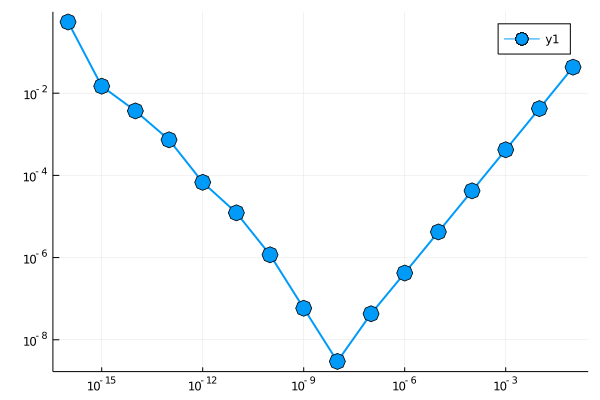

-01 | 4.29e-02  
 1.0e-02 | 4.22e-03  
 1.0e-03 | 4.21e-04  
 1.0e-04 | 4.21e-05  
 1.0e-05 | 4.21e-06  
 1.0e-06 | 4.21e-07  
 1.0e-07 | 4.29e-08  
 1.0e-08 | 2.97e-09  
 1.0e-09 | 5.85e-08  
 1.0e-10 | 1.17e-06  
 1.0e-11 | 1.23e-05  
 1.0e-12 | 6.78e-05  
 1.0e-13 | 7.34e-04  
 1.0e-14 | 3.71e-03  
 1.0e-15 | 1.48e-02  
 1.0e-16 | 5.40e-01  
---------|----------- 
passed


true

In [5]:
f(x) = sin.(x)
g(x) = cos.(x)
x = [1.0]
fdtest(f, g, x)

In [6]:
x = [0.0]
fdtest(f, g, x)

---------|----------- 
    h    | error 
---------|----------- 
 1.0e-01 | 1.67e-03  
 1.0e-02 | 1.67e-05  
 1.0e-03 | 1.67e-07  
 1.0e-04 | 1.67e-09  
 1.0e-05 | 1.67e-11  
 1.0e-06 | 1.67e-13  
 1.0e-07 | 1.67e-15  
 1.0e-08 | 0.00e+00  
 1.0e-09 | 0.00e+00  
 1.0e-10 | 0.00e+00  
 1.0e-11 | 0.00e+00  
 1.0e-12 | 0.00e+00  
 1.0e-13 | 0.00e+00  
 1.0e-14 | 0.00e+00  
 1.0e-15 | 0.00e+00  
 1.0e-16 | 0.00e+00  
---------|----------- 


┌ Warning: No strict ticks found
└ @ PlotUtils /Users/work/.julia/packages/PlotUtils/nCtbM/src/ticks.jl:283


ArgumentError: ArgumentError: At least one finite value must be provided to formatter.

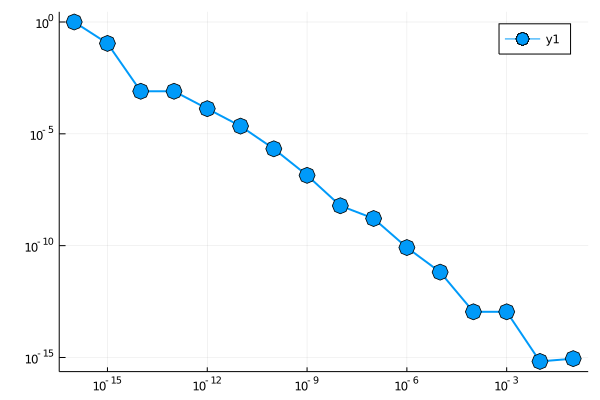

---------|----------- 
    h    | error 
---------|----------- 
 1.0e-01 | 8.88e-16  
 1.0e-02 | 6.66e-16  
 1.0e-03 | 1.10e-13  
 1.0e-04 | 1.10e-13  
 1.0e-05 | 6.55e-12  
 1.0e-06 | 8.23e-11  
 1.0e-07 | 1.64e-09  
 1.0e-08 | 6.08e-09  
 1.0e-09 | 1.39e-07  
 1.0e-10 | 2.14e-06  
 1.0e-11 | 2.21e-05  
 1.0e-12 | 1.33e-04  
 1.0e-13 | 7.99e-04  
 1.0e-14 | 7.99e-04  
 1.0e-15 | 1.10e-01  
 1.0e-16 | 1.00e+00  
---------|----------- 
passed


true

In [7]:
f(x) = abs.(x)
g(x) = 0.5*(sign.(x) .+ 1.0)
x = [1.0]
fdtest(f,g,x)

In [8]:
@show eps(Float32)
@show eps(Float64)

eps(Float32) = 1.1920929f-7
eps(Float64) = 2.220446049250313e-16


2.220446049250313e-16

In [9]:
setprecision(1000)
@show BigFloat(pi)
@show eps(BigFloat)

BigFloat(pi) = 3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938446095505822317253594081284811174502841027019385211055596446229489549303819644288109756659334461284756482337867831652712019091456485669234603486104543266482133936072602491412736
eps(BigFloat) = 1.8665272370064377579801790894476343392341828927434160492434286795919338219515512689088806541957622047191899798606484852484309750427080647896830416344078615124688213322766503005479901519718036630222009815925302262364810250295918675816103565422508302076213967577088529622389396284573219184440353258208856e-301


1.8665272370064377579801790894476343392341828927434160492434286795919338219515512689088806541957622047191899798606484852484309750427080647896830416344078615124688213322766503005479901519718036630222009815925302262364810250295918675816103565422508302076213967577088529622389396284573219184440353258208856e-301

In [10]:
@show eps()/0.0
@show 0.0/0.0

eps() / 0.0 = Inf
0.0 / 0.0 = NaN


NaN

In [11]:
# it is a bit strange that the floating number representation of 2/3 ends with 6 other than 7
@show 2.0/3.0
rounding(Float64)

2.0 / 3.0 = 0.6666666666666666


RoundingMode{:Nearest}()

In [12]:
setrounding(BigFloat, RoundUp)
2.0/3.0

0.6666666666666666